In [1]:
import discretisedfield as df
import micromagneticmodel as mm

import mumax3c as mc

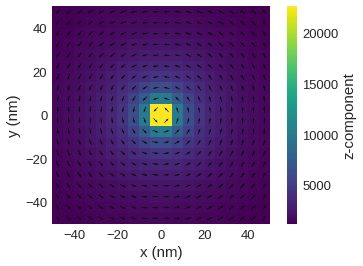

In [2]:
# Geometry
L = 100e-9  # sample edge length (m)
thickness = 5e-9  # sample thickness (m)

# Material (Permalloy) parameters
Ms = 8e5  # saturation magnetisation (A/m)
A = 13e-12  # exchange energy constant (J/m)

# Dynamics (LLG equation) parameters
gamma0 = mm.consts.gamma0  # gyromagnetic ratio (m/As)
alpha = 0.2  # Gilbert damping

system = mm.System(name="vortex_dynamics")

# Energy equation. We omit Zeeman energy term, because H=0.
system.energy = mm.Exchange(A=A) + mm.Demag()

# Dynamics equation
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)


# initial magnetisation state
def m_init(point):
    x, y, z = point
    c = 1e9  # (1/m)
    return (-c * y, c * x, 0.1)


# Sample's centre is placed at origin
region = df.Region(
    p1=(-L / 2, -L / 2, -thickness / 2), p2=(L / 2, L / 2, thickness / 2)
)
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms)

system.m.plane("z").mpl()

In [3]:
system.energy

Exchange(A=1.3e-11) + Demag()

In [4]:
md = mc.MinDriver()
md.drive(system)

Running mumax3 (ExeMumax3Runner) [2022/05/05 11:34]... (0.3 s)


In [5]:
system.table

     t            mx   my       mz             E  E_totalexchange  \
0  0.0 -4.470348e-10  0.0 -0.02298  1.764018e-18     1.365333e-18   

        E_demag  E_zeeman  E_totalanisotropy            dt     maxtorque  
0  3.986850e-19      -0.0                0.0  1.000000e-15  6.950506e-07  

Running mumax3 (ExeMumax3Runner) [2022/05/05 11:34]... (0.3 s)


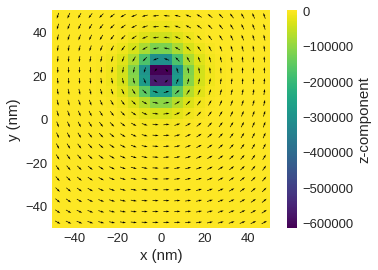

In [6]:
H = (1e4, 0, 0)  # an external magnetic field (A/m)

system.energy += mm.Zeeman(H=H)

md.drive(system)
system.m.plane("z").mpl()

In [7]:
system.energy.zeeman.H = (0, 0, 0)

In [8]:
td = mc.TimeDriver()
td.drive(system, t=5e-9, n=500)

Running mumax3 (ExeMumax3Runner) [2022/05/05 11:34]... (2.4 s)


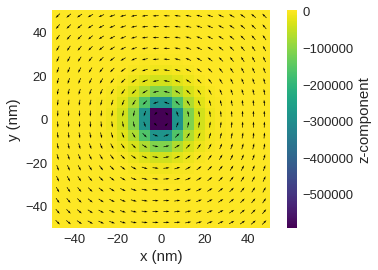

In [9]:
system.m.plane("z").mpl()

In [10]:
system.table.data[["t", "mx", "my", "mz", "E"]]

,t,mx,my,mz,E
0,1.000000e-11,3.517107e-01,-0.000736,-0.023201,1.852231e-18
1,2.000000e-11,3.360584e-01,-0.002523,-0.023107,1.849495e-18
2,3.000000e-11,3.185305e-01,-0.005896,-0.022859,1.846044e-18
3,4.000000e-11,3.032514e-01,-0.010964,-0.022425,1.842842e-18
4,5.000000e-11,2.922319e-01,-0.017476,-0.021896,1.840326e-18
...,...,...,...,...,...
495,4.960000e-09,-8.344352e-05,0.000247,-0.022980,1.764018e-18
496,4.970000e-09,-6.157302e-05,0.000247,-0.022980,1.764018e-18
497,4.980000e-09,-4.027560e-05,0.000246,-0.022980,1.764018e-18
498,4.990000e-09,-1.967967e-05,0.000242,-0.022980,1.764018e-18


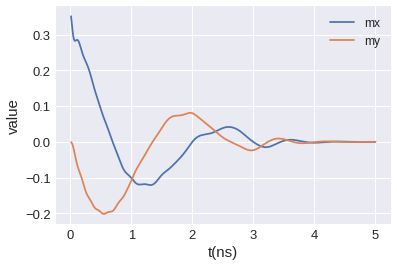

In [11]:
system.table.mpl(y=["mx", "my"])